**Enigmes quantique n2 - Les quatre chevelures**

Alice, Bob, Charlie et Dalia sont disposés en ligne, et la couleur de leurs cheveux est choisie aléatoirement entre orange et indigo. Chacune des personnes peut voir la couleur de cheveux de celles qui sont devant elle, mais pas la sienne. Le défi consiste pour chaque individu à deviner correctement la couleur de ses propres cheveux.

In [1]:
from qiskit import QuantumCircuit, Aer, transpile,execute
from qiskit.visualization import *
from qiskit.providers.aer import AerSimulator

***Création du circuit***

8 qbits seront utilisés en total, 4 afin de définir les participants et 4 pour le raisonnement de chaqu'un d'entre eux

In [2]:
circuit = QuantumCircuit(8)

Applique la porte Hadamard sur les quatre premiers qubits, qui représentent les personnes.

In [3]:
circuit.h(0)
circuit.h(1)
circuit.h(2)
circuit.h(3)
circuit.barrier()

On utilise la porte CX (ayant comme cible le qubit 4) pour représenter ce que Alice peut voir:


/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


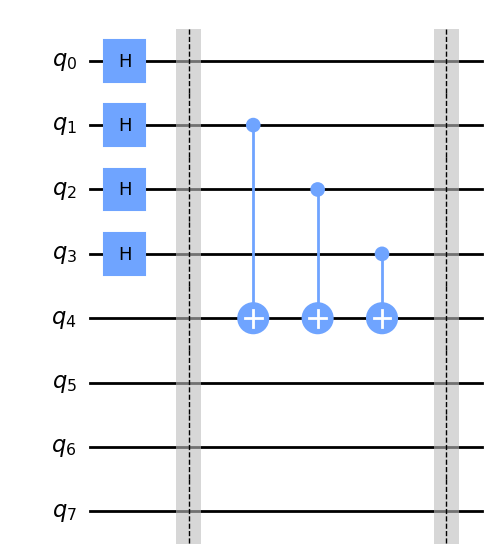

In [4]:
circuit.cx(1, 4)
circuit.cx(2, 4)
circuit.cx(3, 4)
circuit.barrier()
circuit.draw('mpl')

Une fois que les autres personnes ont pris en compte ce que Alice a dit, ils stockent le résultant dans leur qbit de raisonnement

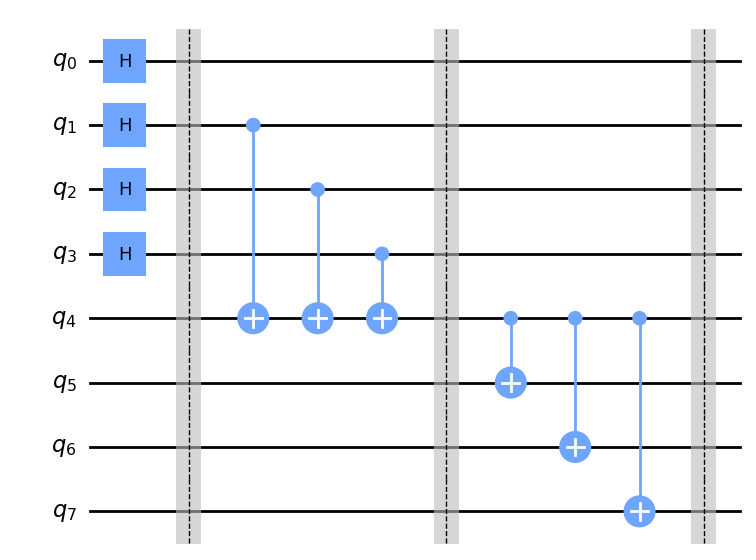

In [5]:
circuit.cx(4, 5)
circuit.cx(4, 6)
circuit.cx(4, 7)
circuit.barrier()
circuit.draw('mpl')


C'est dont le moment de Bob pour utiliser la porte CX pour noter les couleurs qu'il voit

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


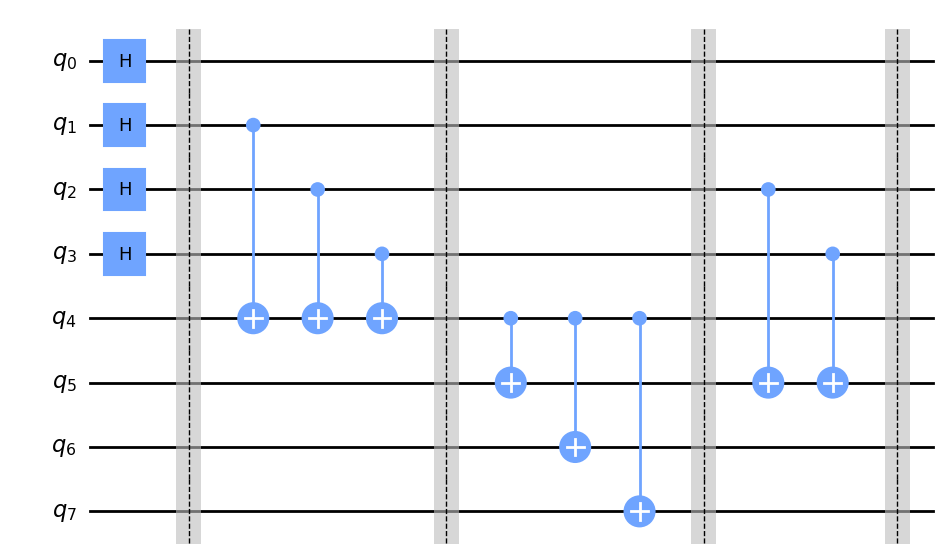

In [6]:
circuit.cx(2, 5)
circuit.cx(3, 5)
circuit.barrier()
circuit.draw('mpl')

Charlie et Dalia stockent sa réponse dans son qbit de raisonnement


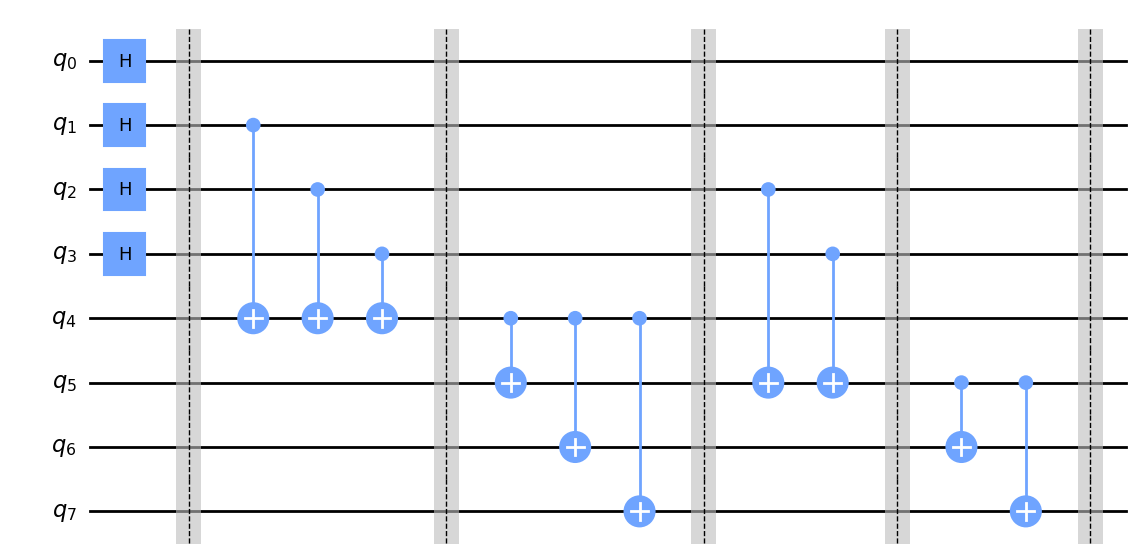

In [7]:
circuit.cx(5, 6)
circuit.cx(5, 7)
circuit.barrier()
circuit.draw('mpl')


C'est dont le moment de Charlie pour utiliser la porte CX pour noter les couleurs qu'il voit

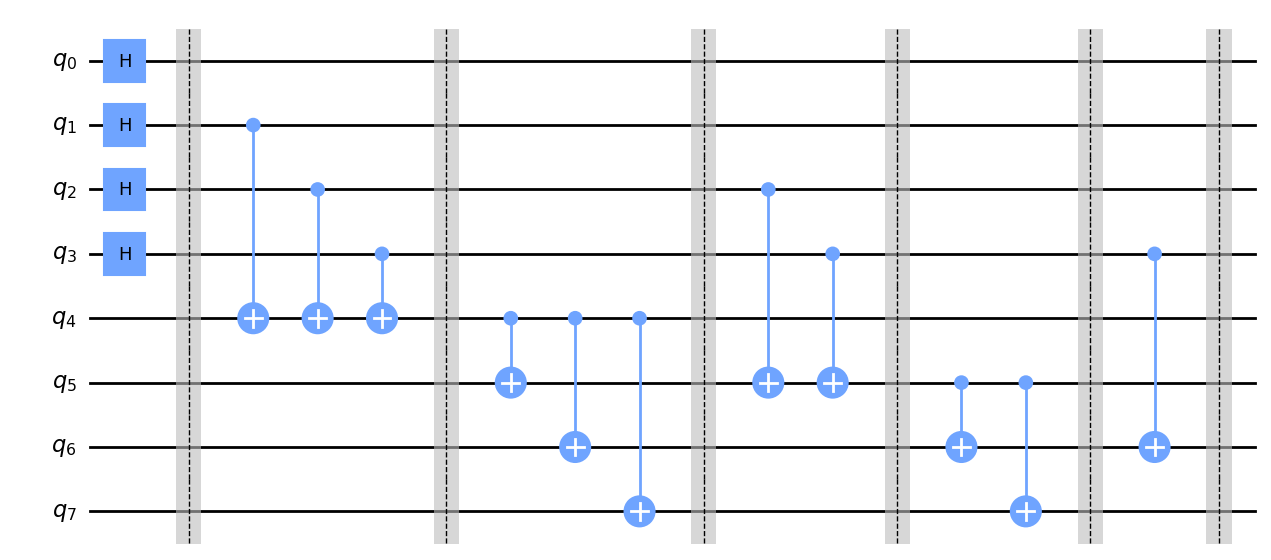

In [8]:
circuit.cx(3, 6)
circuit.barrier()
circuit.draw('mpl')

Dalia stocke sa réponse dans son qbit de raisonnement

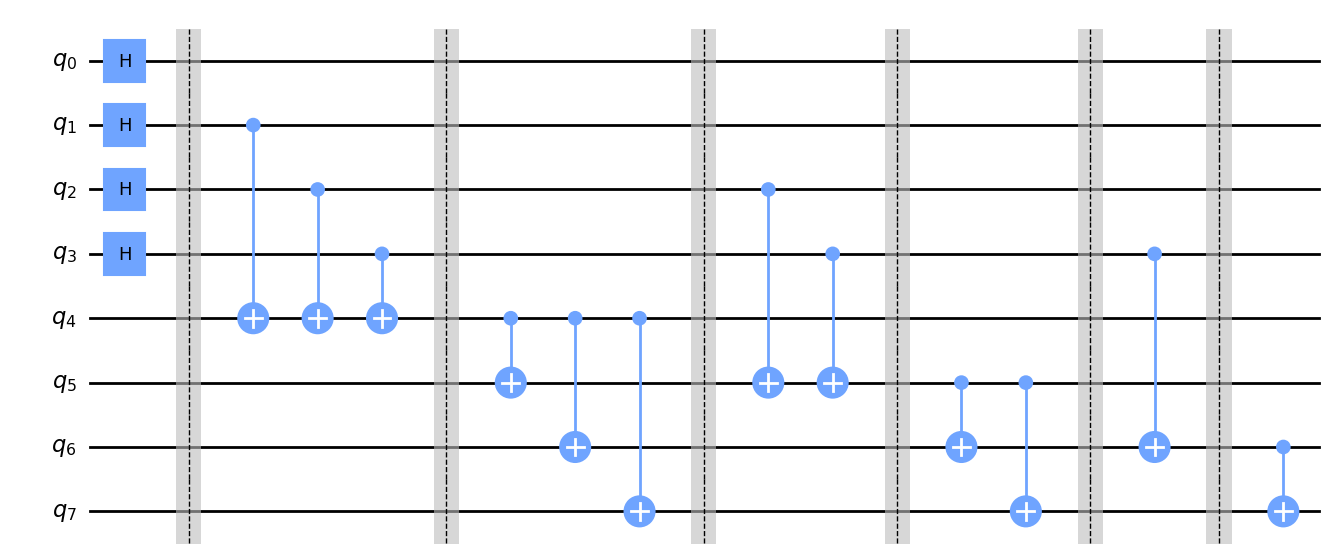

In [9]:
circuit.cx(6, 7)
circuit.draw('mpl')

***Visualisation des résultats***

*Simulation Qsphere*

In [10]:
statevector_backend = Aer.get_backend('statevector_simulator')
statevector_job = statevector_backend.run(circuit)
statevector_result = statevector_job.result()
statevector_outputstate = statevector_result.get_statevector(circuit, decimals = 8)
statevector_counts = statevector_result.get_counts()

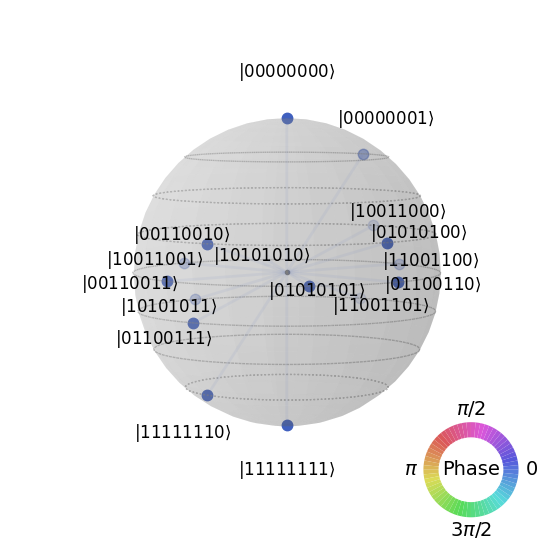

In [11]:
plot_state_qsphere(statevector_outputstate)

*Création des vecteurs états*

In [12]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circuit, shots=1)
result = job.result()
outputstate = result.get_statevector(circuit, decimals=3)
print(outputstate)

Statevector([0.25+0.j, 0.25+0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
             0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
             0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
             0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
             0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
             0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
             0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
             0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
             0.  +0.j, 0.  +0.j, 0.25+0.j, 0.25+0.j, 0.  +0.j, 0.  +0.j,
             0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
             0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
             0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
             0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
             0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j

*Simulation sur 1000 prédictions*

In [13]:
circuit.measure_all()
simulator: AerSimulator = Aer.get_backend('aer_simulator')
circuit = transpile(circuit, simulator)
result = simulator.run(circuit, shots=1000).result()
counts = result.get_counts(circuit)

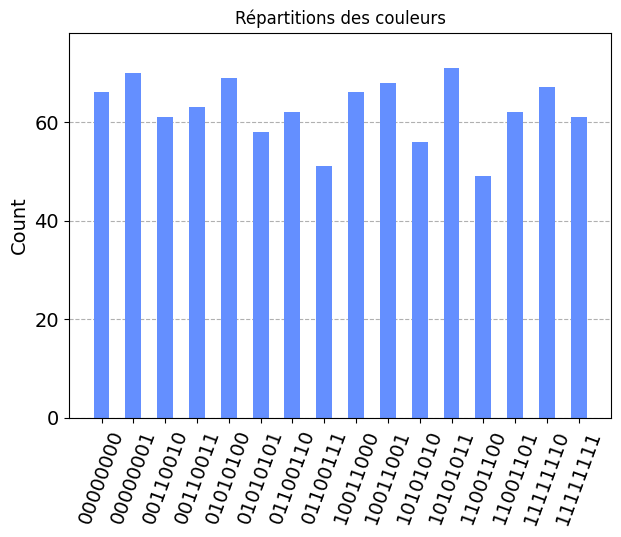

In [14]:
plot_histogram(counts, title='Répartitions des couleurs', bar_labels=False)

*Simulation sur 100000 prédictions*

In [15]:
result = simulator.run(circuit, shots=100_000).result()
counts = result.get_counts(circuit)

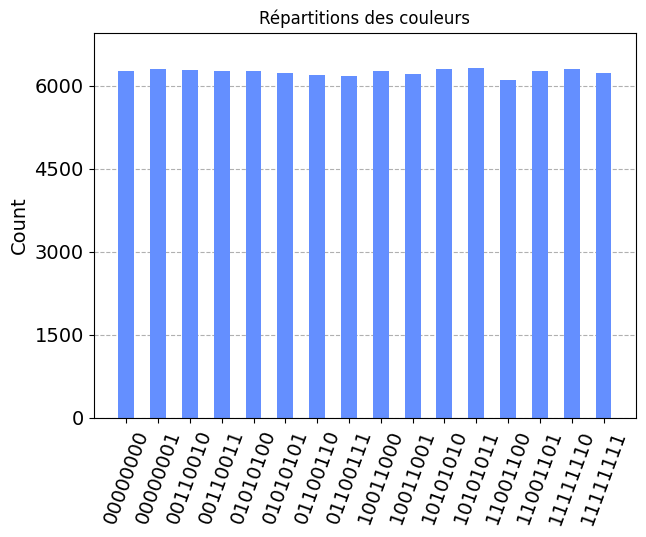

In [16]:
plot_histogram(counts, title='Répartitions des couleurs', bar_labels=False)

On peut noter que lorsqu'on simule la situation 1000 fois les résultats sont un peu différents mais lorsqu'on augmente le nombre les résultats ont tendance à etre ressemblants.